In [0]:
import numpy as np
import pandas as pd
pd.set_option('max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack,csr_matrix
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split,KFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.util import ngrams
import os
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls


In [0]:
train = pd.read_csv('/train.csv')
test = pd.read_csv('/test.csv')


Text(0.5, 1.0, 'Distribution of log-transformed Revenue')

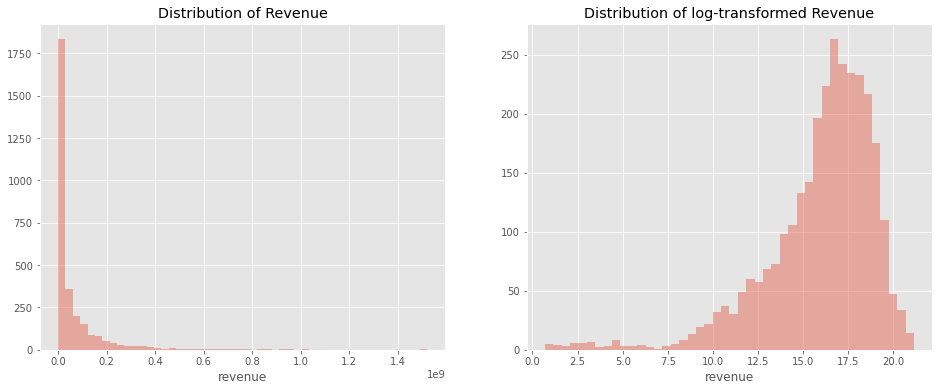

In [0]:
#Visualizizng Target Distribution
fig,ax = plt.subplots(figsize = (16,6))
plt.subplot(1,2,1)
sns.distplot(train['revenue'],kde=False);
plt.title("Distribution of Revenue")
plt.subplot(1,2,2)
sns.distplot(np.log1p(train['revenue']),kde=False);
plt.title("Distribution of log-transformed Revenue")

In [0]:
train['log_revenue'] = np.log1p(train['revenue'])

Text(0.5, 1.0, 'Log_Revenue vs Log_Budget')

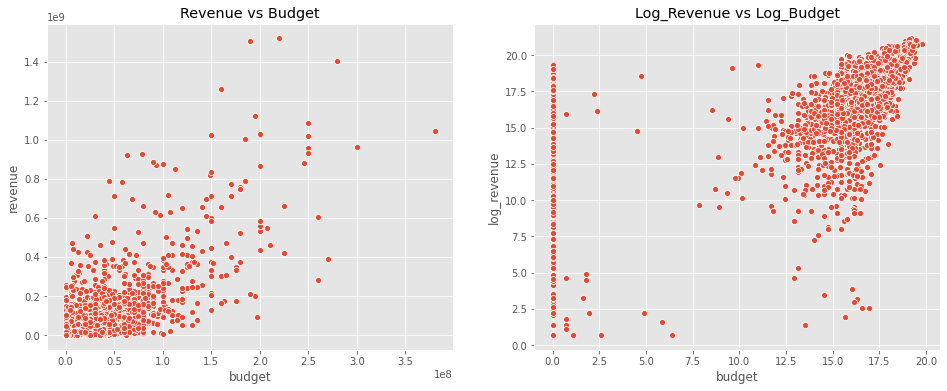

In [0]:
#Relationship between Film Revenue and Budget
fig,ax = plt.subplots(figsize = (16,6))
plt.subplot(1,2,1)
sns.scatterplot(x=train['budget'],y=train['revenue']);
plt.title("Revenue vs Budget")
plt.subplot(1,2,2)
sns.scatterplot(x=np.log1p(train['budget']),y=train['log_revenue']);
plt.title("Log_Revenue vs Log_Budget")

In [0]:
train['log_budeget'] = np.log1p(train['budget'])
test['log_budget'] = np.log1p(train['budget'])

In [0]:
#Does Homepage Affect Revenue
train['has_homepage'] = 0
train.loc[train['homepage'].isnull() == False,'has_homepage'] = 1
test['has_homepage'] = 0
test.loc[test['homepage'].isnull() == False,'has_homepage'] = 1

Text(0.5, 1.0, 'Revenue for films with and without homepage')

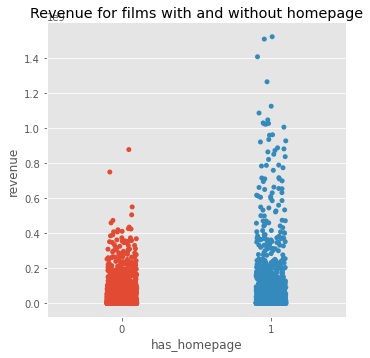

In [0]:
sns.catplot(x ='has_homepage',y ='revenue',data = train);
plt.title("Revenue for films with and without homepage")

Text(0.5, 1.0, 'Mean Log_Revenue per Language')

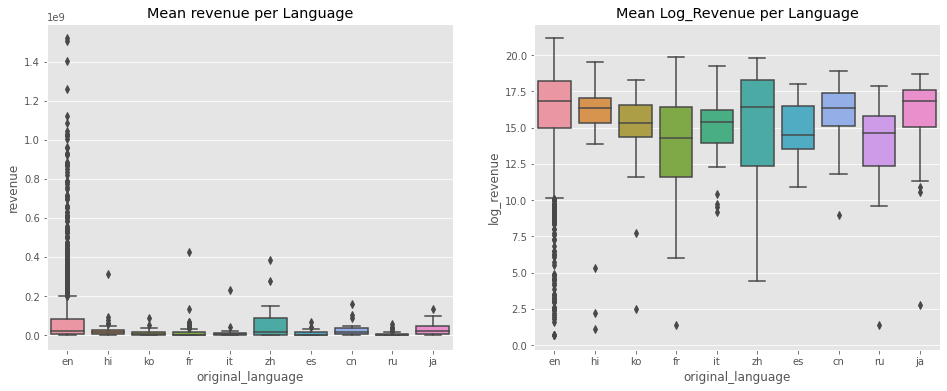

In [0]:
#Distribution of languages in Film
language_data = train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]

fig,ax = plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.boxplot(x='original_language',y='revenue',data=language_data);
plt.title("Mean revenue per Language")
plt.subplot(1,2,2)
sns.boxplot(x='original_language',y='log_revenue',data=language_data);
plt.title("Mean Log_Revenue per Language")

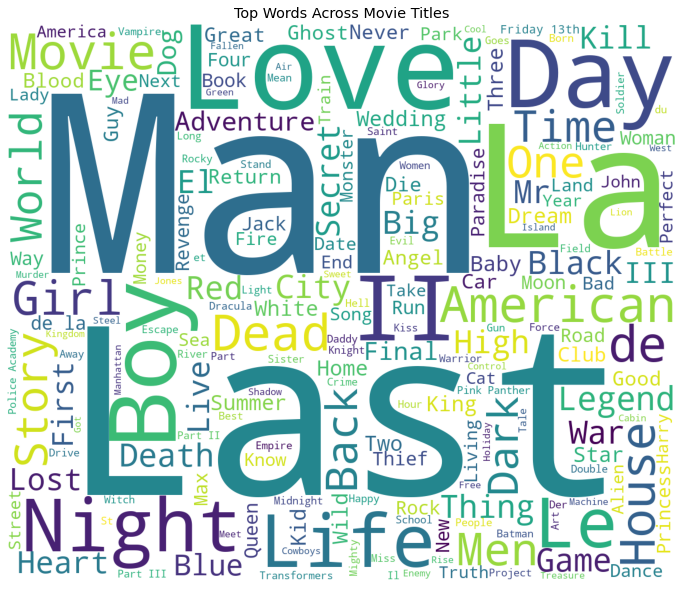

In [0]:
#Frequent Words in Films Titles and Descriptions

plt.figure(figsize = (12,12))
text = ' '.join(train['original_title'].values)
wordcloud = WordCloud(max_font_size = None,background_color='white',width=1200,height=1000).generate(text)
plt.imshow(wordcloud);
plt.title("Top Words Across Movie Titles")
plt.axis('off')
plt.show()



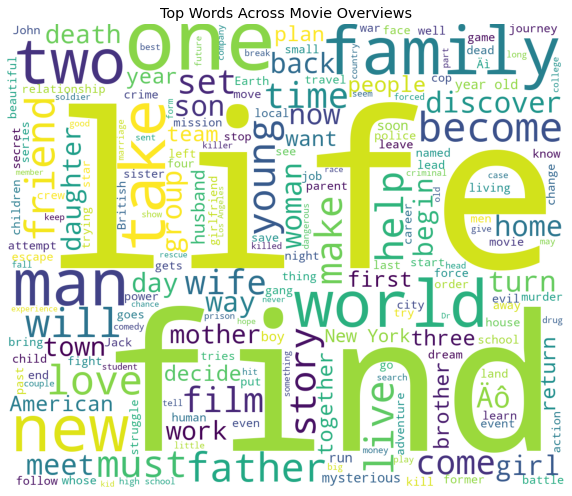

In [0]:
plt.figure(figsize = (10,10))
text = ' '.join(train['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size = None,background_color='white',width=1200,height=1000).generate(text)
plt.imshow(wordcloud);
plt.title("Top Words Across Movie Overviews")
plt.axis('off')
plt.show()

In [0]:
#Do films description affect Revenue
!pip install eli5
import eli5
from sklearn.linear_model import LinearRegression

     |████████████████████████████████| 112kB 2.8MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.

Using TensorFlow backend.


In [0]:
vectorizer = TfidfVectorizer(
    sublinear_tf = True,
    analyzer = 'word',
    token_pattern = r'\w{1,}',
    ngram_range = [1,2],
    min_df = 5
)
overview_text = vectorizer.fit_transform(train['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text,train['log_revenue'])
eli5.show_weights(linreg,vec = vectorizer,top=20,feature_filter = lambda x:x!='<BIAS>')

In [0]:
#Analayzing movie Release Dates
test.loc[test['release_date'].isnull()==False,'release_date'].head()

0    7/14/07
1    5/19/58
2    5/23/97
3     9/4/10
4    2/11/05
Name: release_date, dtype: object

In [0]:
def fix_date(x):
  year = x.split('/')[2]
  if int(year)<=19:
    return x[:-2] + '20' + year
  else:
    return x[:-2] + '19'+year

In [0]:
test.loc[test['release_date'].isnull()==True]


,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,tagline,title,Keywords,collection_name,has_collection,num_genres,all_genres,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,production_company_Warner Bros.,production_company_Universal Pictures,production_company_Paramount Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_Columbia Pictures,production_company_Metro-Goldwyn-Mayer (MGM),production_company_New Line Cinema,production_company_Touchstone Pictures,production_company_Walt Disney Pictures,production_company_Columbia Pictures Corporation,production_company_TriStar Pictures,production_company_Relativity Media,production_company_Canal+,production_company_United Artists,production_company_Miramax Films,production_company_Village Roadshow Pictures,production_company_Regency Enterprises,production_company_BBC Films,production_company_Dune Entertainment,production_company_Working Title Films,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,production_country_United States of America,production_country_United Kingdom,production_country_France,production_country_Germany,production_country_Canada,production_country_India,production_country_Italy,production_country_Japan,production_country_Australia,production_country_Russia,production_country_Spain,production_country_China,production_country_Hong Kong,production_country_Ireland,production_country_Belgium,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,language_English,language_Français,language_Español,language_Deutsch,language_Pусский,language_Italiano,language_日本語,language_普通话,language_हिन्दी,language_,language_Português,language_العربية,language_한국어/조선말,language_广州话 / 廣州話,language_தமிழ்,language_Polski,language_Magyar,language_Latin,language_svenska,language_ภาษาไทย,language_Český,language_עִבְרִית,language_ελληνικά,language_Türkçe,language_Dansk,language_Nederlands,language_فارسی,language_Tiếng Việt,language_اردو,language_Română,num_cast,cast_name_Samuel L. Jackson,cast_name_Robert De Niro,cast_name_Morgan Freeman,cast_name_J.K. Simmons,cast_name_Bruce Willis,cast_name_Liam Neeson,cast_name_Susan Sarandon,cast_name_Bruce McGill,cast_name_John Turturro,cast_name_Forest Whitaker,cast_name_Willem Dafoe,cast_name_Bill Murray,cast_name_Owen Wilson,cast_name_Nicolas Cage,cast_name_Sylvester Stallone,genders_0_cast,genders_1_cast,genders_2_cast,cast_character_,cast_character_Himself,cast_character_Herself,cast_character_Dancer,cast_character_Additional Voices (voice),cast_character_Doctor,cast_character_Reporter,cast_character_Waitress,cast_character_Nurse,cast_character_Bartender,cast_character_Jack,cast_character_Debutante,cast_character_Security Guard,cast_character_Paul,cast_character_Frank,num_crew,crew_name_Avy Kaufman,crew_name_Robert Rodriguez,crew_name_Deborah Aquila,crew_name_James Newton Howard,crew_name_Mary Vernieu,crew_name_Steven Spielberg,crew_name_Luc Besson,crew_name_Jerry Goldsmith,crew_name_Francine Maisler,crew_name_Tricia Wood,crew_name_James Horner,crew_name_Kerry Barden,crew_name_Bob Weinstein,crew_name_Harvey Weinstein,crew_name_Janet Hirshenson,genders_0_crew,genders_1_crew,genders_2_crew,jobs_Producer

In [0]:
test.loc[test['original_title'] == 'Jails, Hospitals & Hip-Hop','release_date'] = '05/01/00'

In [0]:
train['release_date'] = train['release_date'].apply(lambda x: fix_date(x))
test['release_date'] = test['release_date'].apply(lambda x: fix_date(x))

AttributeError: ignored

In [0]:
#Creating features based on release date
train['release_date'] = pd.to_datetime(train['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])

In [0]:
def process(df):
  date_parts = ['year','weekday','month','weekofyear','day','quarter']
  for part in date_parts:
    part_col = 'release_date'+'_'+part
    df[part_col] = getattr(df['release_date'].dt,part).astype(int)
  return df
train = process(train)
test = process(test)

AttributeError: ignored

In [0]:
#Using Plotly to Visualize the Number of films Per Year
d1 = train['release_date_year'].value_counts().sort_index()
d2 = test['release_date_year'].value_counts().sort_index()

In [0]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [0]:
enable_plotly_in_cell()
data = [go.Scatter(x=d1.index,y=d1.values,name='Train'),go.Scatter(x=d2.index,y=d2.values,name='Test')]
layout = go.Layout(dict(title='Number of films per year'
        ,xaxis=dict(title='Year'),yaxis=dict(title='Count of films'),legend=dict(orientation='v')))
py.iplot(dict(data=data,layout=layout))



In [0]:
d1 = train['release_date_year'].value_counts().sort_index()
d2 = train.groupby(train['release_date_year'])['revenue'].sum()

In [0]:
#Number of films and total Revenue per year
enable_plotly_in_cell()
data = [go.Scatter(x=d1.index,y=d1.values,name='Film Count'),go.Scatter(x=d2.index,y=d2.values,name='Total Revenue',yaxis='y2')]
layout = go.Layout(dict(title='Number of films and Total Revenue per year',xaxis=dict(title='Year'),yaxis=dict(title='Count of films'),
                   yaxis2=dict(title='Total Revenue',overlaying='y',side='right'),legend=dict(orientation='v')))
py.iplot(dict(data=data,layout=layout))

In [0]:
d1 = train['release_date_year'].value_counts().sort_index()
d2 = train.groupby(train['release_date_year'])['revenue'].mean()

In [0]:
#Number of films and total Revenue per year
enable_plotly_in_cell()
data = [go.Scatter(x=d1.index,y=d1.values,name='Film Count'),go.Scatter(x=d2.index,y=d2.values,name='T Revenue',yaxis='y2')]
layout = go.Layout(dict(title='Number of films and Total Revenue per year',xaxis=dict(title='Year'),yaxis=dict(title='Count of films'),
                   yaxis2=dict(title='Total Revenue',overlaying='y',side='right'),legend=dict(orientation='v')))
py.iplot(dict(data=data,layout=layout))

Text(0.5, 1.0, 'Revenue on different days of week')

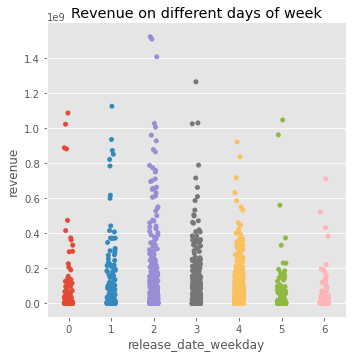

In [0]:
5#Do Release days impact revenue
sns.catplot(x='release_date_weekday',y='revenue',data = train)
plt.title("Revenue on different days of week")

Text(0.5, 1.0, 'Distribution of length of films in hours')

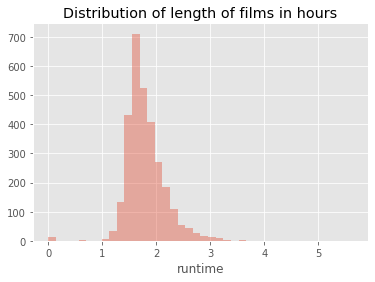

In [0]:
#Relationship between Runtime and Revenue
sns.distplot(train['runtime'].fillna(0) / 60,bins=40,kde = False)
plt.title("Distribution of length of films in hours")

Text(0.5, 1.0, 'Runtime vs Revenue')

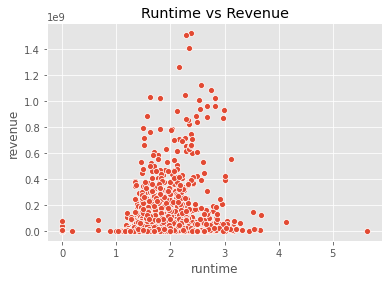

In [0]:
sns.scatterplot(x=train['runtime'].fillna(0)/60,y = train['revenue'])
plt.title("Runtime vs Revenue")